In [1]:
# https://nbviewer.jupyter.org/github/ilguyi/gans.tensorflow.v2/blob/master/tf.v2/01.dcgan.ipynb

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%env CUDA_DEVICE_ORDER=PCI_BUS_ID
%env CUDA_VISIBLE_DEVICES=1

env: CUDA_DEVICE_ORDER=PCI_BUS_ID
env: CUDA_VISIBLE_DEVICES=1


In [4]:
import tensorflow as tf
from datetime import datetime
from tqdm.autonotebook import tqdm
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [5]:
from avgn.networks.gan import GAN
from avgn.networks.test_datasets import load_fashion_MNIST
from avgn.networks.sample_networks import fc_net, conv_net

In [6]:
epochs = 100
latent_dim = 100
dims = (28 , 28, 1)

In [7]:
num_examples_to_generate = 16

random_vector_for_generation = tf.random.normal(
    shape=[num_examples_to_generate, latent_dim]
)

In [8]:
network_arch = conv_net(dims=dims, n_Z = latent_dim)

In [9]:
# get the datasets
train_dataset, test_dataset = load_fashion_MNIST()

In [10]:
from avgn.networks.gan import GAN, test_network

# prepare the optimizer
gen_lr = 0.001
disc_lr = 0.005

gen_optimizer = tf.keras.optimizers.Adam(gen_lr, beta_1=0.5)
disc_optimizer = tf.keras.optimizers.RMSprop(disc_lr)

# train the model
model = GAN(
    gen = network_arch.decoder,
    disc = network_arch.discriminator,
    dims = dims, 
    gen_optimizer = gen_optimizer,
    disc_optimizer = disc_optimizer,
    n_Z = latent_dim,
)

In [11]:
num_examples_to_generate = 16

random_vector_for_generation = tf.random.normal(
    shape=[num_examples_to_generate, latent_dim]
)

from IPython import display
def generate_images(model, D_losses, G_losses, eps=None):
    display.clear_output()
    test = model.sample(eps = eps)
    fig, axs = plt.subplots(ncols=8, nrows = 2, figsize=(16,4))
    for axi, ax in enumerate(axs.flatten()):
        ax.matshow(np.squeeze(test.numpy()[axi]), cmap = plt.cm.Greys)
        ax.axis('off')
    plt.show()
    fig, ax = plt.subplots(figsize=(16,4))
    ax.plot(D_losses, label="D")
    ax.plot(G_losses, label="G")
    ax.legend()
    plt.show()

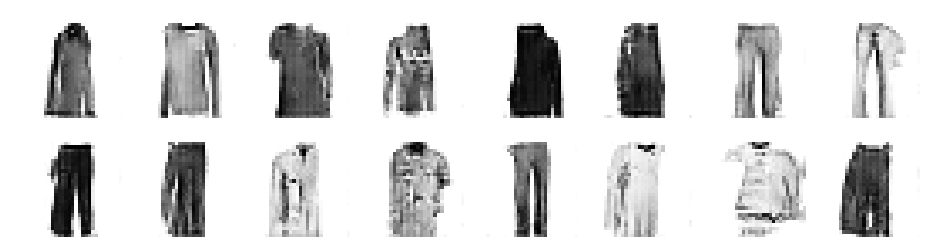

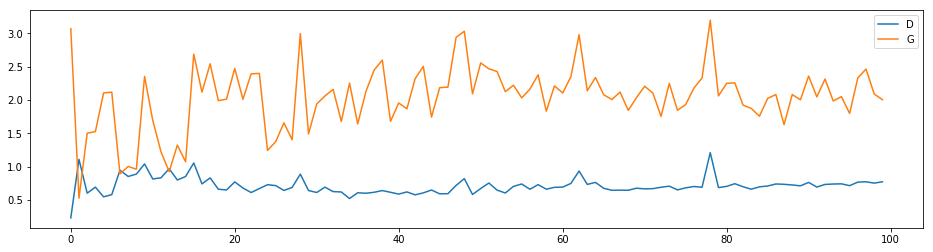

100


In [12]:
D_losses = []
G_losses = []
for epoch in range(1, epochs + 1):
    model.train(train_dataset)
    if epoch % 1 == 0:
        D_loss, G_loss = test_network(model, test_dataset)
        D_losses.append(D_loss)
        G_losses.append(G_loss)
        generate_images(model, D_losses, G_losses, eps = random_vector_for_generation)
        print(epoch)
        

In [13]:
#%load_ext tensorboard.notebook
#from tensorflow.python.summary.writer.writer import FileWriter
#FileWriter('logs/train', graph=GAN.graph).close()
#%tensorboard --logdir logs/train